In [1]:
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
import os 
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import linregress
from sklearn import datasets

In [2]:
url = "https://statsapi.web.nhl.com/api/v1/teams"

In [3]:
response = requests.get(url + "?expand=team.stats")
print(response.content)

b'{\n  "copyright" : "NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. \xc2\xa9 NHL 2020. All Rights Reserved.",\n  "teams" : [ {\n    "id" : 1,\n    "name" : "New Jersey Devils",\n    "link" : "/api/v1/teams/1",\n    "venue" : {\n      "name" : "Prudential Center",\n      "link" : "/api/v1/venues/null",\n      "city" : "Newark",\n      "timeZone" : {\n        "id" : "America/New_York",\n        "offset" : -4,\n        "tz" : "EDT"\n      }\n    },\n    "abbreviation" : "NJD",\n    "teamName" : "Devils",\n    "locationName" : "New Jersey",\n    "firstYearOfPlay" : "1982",\n    "division" : {\n      "id" : 18,\n      "name" : "Metropolitan",\n      "nameShort" : "Metro",\n      "link" : "/api/v1/divisions/18",\n      "abbreviation" : "M"\n    },\n    "conference" : {\n      "id" : 6,\n      "name" : "Eastern",\n      "link" : "/api/v1/conferences/6"\n    },\n    "franchise" : {\n      "franc

In [4]:
response = requests.get(url + "?expand=team.stats").json()
pprint(response)

{'copyright': 'NHL and the NHL Shield are registered trademarks of the '
              'National Hockey League. NHL and NHL team marks are the property '
              'of the NHL and its teams. © NHL 2020. All Rights Reserved.',
 'teams': [{'abbreviation': 'NJD',
            'active': True,
            'conference': {'id': 6,
                           'link': '/api/v1/conferences/6',
                           'name': 'Eastern'},
            'division': {'abbreviation': 'M',
                         'id': 18,
                         'link': '/api/v1/divisions/18',
                         'name': 'Metropolitan',
                         'nameShort': 'Metro'},
            'firstYearOfPlay': '1982',
            'franchise': {'franchiseId': 23,
                          'link': '/api/v1/franchises/23',
                          'teamName': 'Devils'},
            'franchiseId': 23,
            'id': 1,
            'link': '/api/v1/teams/1',
            'locationName': 'New Jersey',
    

            'name': 'Ottawa Senators',
            'officialSiteUrl': 'http://www.ottawasenators.com/',
            'shortName': 'Ottawa',
            'teamName': 'Senators',
            'teamStats': [{'splits': [{'stat': {'evGGARatio': 0.8217,
                                                'faceOffWinPercentage': '50.3',
                                                'faceOffsLost': 2110.0,
                                                'faceOffsTaken': 4242.0,
                                                'faceOffsWon': 2132.0,
                                                'gamesPlayed': 71,
                                                'goalsAgainstPerGame': 3.352,
                                                'goalsPerGame': 2.676,
                                                'losses': 34,
                                                'ot': 12,
                                                'penaltyKillPercentage': '76.1',
                                          

                                                 'postseason': False}}}],
            'venue': {'city': 'Chicago',
                      'id': 5092,
                      'link': '/api/v1/venues/5092',
                      'name': 'United Center',
                      'timeZone': {'id': 'America/Chicago',
                                   'offset': -5,
                                   'tz': 'CDT'}}},
           {'abbreviation': 'DET',
            'active': True,
            'conference': {'id': 6,
                           'link': '/api/v1/conferences/6',
                           'name': 'Eastern'},
            'division': {'abbreviation': 'A',
                         'id': 17,
                         'link': '/api/v1/divisions/17',
                         'name': 'Atlantic',
                         'nameShort': 'ATL'},
            'firstYearOfPlay': '1926',
            'franchise': {'franchiseId': 12,
                          'link': '/api/v1/franchises/12',
             

                                                'penaltyKillOpportunities': '21st',
                                                'penaltyKillPercentage': '16th',
                                                'powerPlayGoals': '3rd',
                                                'powerPlayGoalsAgainst': '18th',
                                                'powerPlayOpportunities': '2nd',
                                                'powerPlayPercentage': '4th',
                                                'ptPctg': '17th',
                                                'pts': '20th',
                                                'savePctRank': '12th',
                                                'shootingPctRank': '8th',
                                                'shotsAllowed': '28th',
                                                'shotsPerGame': '18th',
                                                'winLeadFirstPer': '16th',
                             

                                                'gamesPlayed': 71,
                                                'goalsAgainstPerGame': 2.831,
                                                'goalsPerGame': 3.0,
                                                'losses': 28,
                                                'ot': 6,
                                                'penaltyKillPercentage': '77.6',
                                                'powerPlayGoals': 42.0,
                                                'powerPlayGoalsAgainst': 39.0,
                                                'powerPlayOpportunities': 205.0,
                                                'powerPlayPercentage': '20.5',
                                                'ptPctg': '56.3',
                                                'pts': 80,
                                                'savePctg': 0.913,
                                                'shootingPctg': 9.6,
              

In [5]:
print(json.dumps(response, indent=4, sort_keys=True))

{
    "copyright": "NHL and the NHL Shield are registered trademarks of the National Hockey League. NHL and NHL team marks are the property of the NHL and its teams. \u00a9 NHL 2020. All Rights Reserved.",
    "teams": [
        {
            "abbreviation": "NJD",
            "active": true,
            "conference": {
                "id": 6,
                "link": "/api/v1/conferences/6",
                "name": "Eastern"
            },
            "division": {
                "abbreviation": "M",
                "id": 18,
                "link": "/api/v1/divisions/18",
                "name": "Metropolitan",
                "nameShort": "Metro"
            },
            "firstYearOfPlay": "1982",
            "franchise": {
                "franchiseId": 23,
                "link": "/api/v1/franchises/23",
                "teamName": "Devils"
            },
            "franchiseId": 23,
            "id": 1,
            "link": "/api/v1/teams/1",
            "locationName": "New 

In [6]:
teams = response["teams"]
pprint(teams)

[{'abbreviation': 'NJD',
  'active': True,
  'conference': {'id': 6, 'link': '/api/v1/conferences/6', 'name': 'Eastern'},
  'division': {'abbreviation': 'M',
               'id': 18,
               'link': '/api/v1/divisions/18',
               'name': 'Metropolitan',
               'nameShort': 'Metro'},
  'firstYearOfPlay': '1982',
  'franchise': {'franchiseId': 23,
                'link': '/api/v1/franchises/23',
                'teamName': 'Devils'},
  'franchiseId': 23,
  'id': 1,
  'link': '/api/v1/teams/1',
  'locationName': 'New Jersey',
  'name': 'New Jersey Devils',
  'officialSiteUrl': 'http://www.newjerseydevils.com/',
  'shortName': 'New Jersey',
  'teamName': 'Devils',
  'teamStats': [{'splits': [{'stat': {'evGGARatio': 0.7821,
                                      'faceOffWinPercentage': '46.8',
                                      'faceOffsLost': 2121.0,
                                      'faceOffsTaken': 3990.0,
                                      'faceOffsWon': 

                'teamName': 'Canadiens'},
  'franchiseId': 1,
  'id': 8,
  'link': '/api/v1/teams/8',
  'locationName': 'Montréal',
  'name': 'Montréal Canadiens',
  'officialSiteUrl': 'http://www.canadiens.com/',
  'shortName': 'Montréal',
  'teamName': 'Canadiens',
  'teamStats': [{'splits': [{'stat': {'evGGARatio': 1.0352,
                                      'faceOffWinPercentage': '50.4',
                                      'faceOffsLost': 2106.0,
                                      'faceOffsTaken': 4249.0,
                                      'faceOffsWon': 2143.0,
                                      'gamesPlayed': 71,
                                      'goalsAgainstPerGame': 3.099,
                                      'goalsPerGame': 2.93,
                                      'losses': 31,
                                      'ot': 9,
                                      'penaltyKillPercentage': '78.7',
                                      'powerPlayGoals': 33.0,

                'link': '/api/v1/franchises/11',
                'teamName': 'Blackhawks'},
  'franchiseId': 11,
  'id': 16,
  'link': '/api/v1/teams/16',
  'locationName': 'Chicago',
  'name': 'Chicago Blackhawks',
  'officialSiteUrl': 'http://www.chicagoblackhawks.com/',
  'shortName': 'Chicago',
  'teamName': 'Blackhawks',
  'teamStats': [{'splits': [{'stat': {'evGGARatio': 1.0,
                                      'faceOffWinPercentage': '49.9',
                                      'faceOffsLost': 1969.0,
                                      'faceOffsTaken': 3933.0,
                                      'faceOffsWon': 1964.0,
                                      'gamesPlayed': 70,
                                      'goalsAgainstPerGame': 3.057,
                                      'goalsPerGame': 2.971,
                                      'losses': 30,
                                      'ot': 8,
                                      'penaltyKillPercentage': '82.1',
   

                'teamName': 'Canucks'},
  'franchiseId': 20,
  'id': 23,
  'link': '/api/v1/teams/23',
  'locationName': 'Vancouver',
  'name': 'Vancouver Canucks',
  'officialSiteUrl': 'http://www.canucks.com/',
  'shortName': 'Vancouver',
  'teamName': 'Canucks',
  'teamStats': [{'splits': [{'stat': {'evGGARatio': 0.9724,
                                      'faceOffWinPercentage': '54.0',
                                      'faceOffsLost': 1842.0,
                                      'faceOffsTaken': 4008.0,
                                      'faceOffsWon': 2166.0,
                                      'gamesPlayed': 69,
                                      'goalsAgainstPerGame': 3.101,
                                      'goalsPerGame': 3.246,
                                      'losses': 27,
                                      'ot': 6,
                                      'penaltyKillPercentage': '80.5',
                                      'powerPlayGoals': 57.0,


                                      'shotsPerGame': '25th',
                                      'winLeadFirstPer': '22nd',
                                      'winLeadSecondPer': '27th',
                                      'winOppScoreFirst': '18th',
                                      'winOutshootOpp': '1st',
                                      'winOutshotByOpp': '1st',
                                      'winScoreFirst': '21st',
                                      'wins': '20th'},
                             'team': {'id': 30,
                                      'link': '/api/v1/teams/30',
                                      'name': 'Minnesota Wild'}}],
                 'type': {'displayName': 'statsSingleSeason',
                          'gameType': {'description': 'Regular season',
                                       'id': 'R',
                                       'postseason': False}}}],
  'venue': {'city': 'St. Paul',
            'id': 5098,
           

In [7]:
teams = response["teams"]
goalspergame  =[]
gapg = []
name = []

for x in teams:
    output1 = x["teamStats"]
    output2 = output1[0]["splits"]
    output3 = output2[0]["stat"]
    goalspergame.append(output3["goalsPerGame"])
    gapg.append(output3["goalsAgainstPerGame"])
    name.append(x["name"])
print(goalspergame, gapg, name)

[2.681, 2.779, 3.329, 3.29, 3.203, 3.243, 2.797, 2.93, 2.676, 3.386, 3.191, 3.304, 3.471, 3.42, 2.971, 2.0, 3.072, 3.141, 2.914, 3.371, 3.141, 3.246, 2.563, 2.58, 2.529, 2.571, 2.571, 3.159, 3.0, 2.714, 3.155] [3.246, 2.794, 3.143, 2.768, 2.841, 2.386, 3.116, 3.099, 3.352, 3.171, 2.838, 3.246, 2.771, 3.072, 3.057, 3.732, 3.101, 2.676, 3.057, 2.714, 3.028, 3.101, 3.169, 2.522, 2.986, 3.214, 2.614, 3.145, 2.831, 2.614, 2.944] ['New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Boston Bruins', 'Buffalo Sabres', 'Montréal Canadiens', 'Ottawa Senators', 'Toronto Maple Leafs', 'Carolina Hurricanes', 'Florida Panthers', 'Tampa Bay Lightning', 'Washington Capitals', 'Chicago Blackhawks', 'Detroit Red Wings', 'Nashville Predators', 'St. Louis Blues', 'Calgary Flames', 'Colorado Avalanche', 'Edmonton Oilers', 'Vancouver Canucks', 'Anaheim Ducks', 'Dallas Stars', 'Los Angeles Kings', 'San Jose Sharks', 'Columbus Blue Jackets', 'Minnesota 

In [8]:
df = pd.DataFrame({ "name": name, "goals per game": goalspergame, "goals against per game": gapg})
df

,name,goals per game,goals against per game
0,New Jersey Devils,2.681,3.246
1,New York Islanders,2.779,2.794
2,New York Rangers,3.329,3.143
3,Philadelphia Flyers,3.290,2.768
4,Pittsburgh Penguins,3.203,2.841
5,Boston Bruins,3.243,2.386
6,Buffalo Sabres,2.797,3.116
7,Montréal Canadiens,2.930,3.099
8,Ottawa Senators,2.676,3.352
9,Toronto Maple Leafs,3.386,3.171


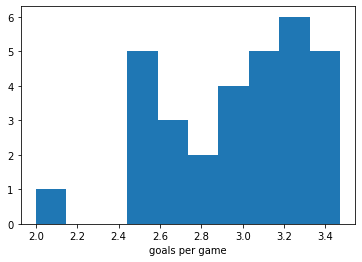

NormaltestResult(statistic=3.6846102796426714, pvalue=0.15845175136131134)


In [9]:
plt.hist(goalspergame)
plt.xlabel('goals per game')
plt.ylabel('')
plt.show()
print(sts.normaltest(goalspergame))

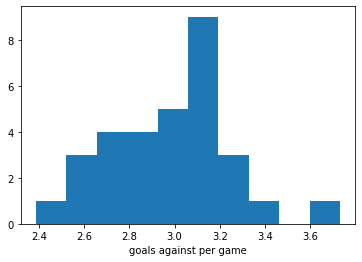

NormaltestResult(statistic=1.1954078824965089, pvalue=0.5500731875980962)


In [10]:
plt.hist(gapg)
plt.xlabel('goals against per game')
plt.ylabel('')
plt.show()
print(sts.normaltest(gapg))

In [11]:
mean_numpy = np.mean(goalspergame)
median_numpy = np.median(goalspergame)
print(f"The Mean Goals Per Game Is {mean_numpy}")
print(f"The Median Goals Per Game Is {median_numpy}")
mean_numpy = np.mean(gapg)
median_numpy = np.median(gapg)
print(f"The Mean Goals Against Per Game Is {mean_numpy}")
print(f"The Median Goals Against Per Game Is {median_numpy}")

The Mean Goals Per Game Is 2.9805806451612904
The Median Goals Per Game Is 3.072
The Mean Goals Against Per Game Is 2.978967741935484
The Median Goals Against Per Game Is 3.057


In [12]:
var_numpy = np.var(goalspergame, ddof = 1)
print(f"The variance for goals per game is {var_numpy}")
sd_numpy = np.std(goalspergame, ddof = 1)
print(f"The standard deviation for goals per game is {sd_numpy}")

The variance for goals per game is 0.11994878494623654
The standard deviation for goals per game is 0.3463362310620079


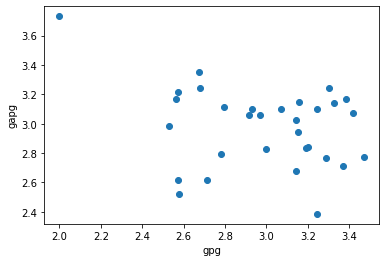

In [13]:
x_values = df["goals per game"]
y_values = df["goals against per game"]
plt.scatter(x_values,y_values)
plt.xlabel('gpg')
plt.ylabel('gapg')
plt.show()

The r-squared is: 0.09434293038655858


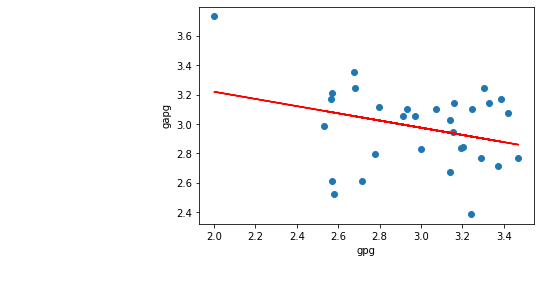

In [14]:
x_values = df["goals per game"]
y_values = df["goals against per game"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,2),fontsize=15,color="red")
plt.xlabel('gpg')
plt.ylabel('gapg')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [15]:
teams = response["teams"]
goalspergame  =[]
faceoffswon = []
name = []

for x in teams:
    output1 = x["teamStats"]
    output2 = output1[0]["splits"]
    output3 = output2[0]["stat"]
    goalspergame.append(output3["goalsPerGame"])
    faceoffswon.append(output3["faceOffWinPercentage"])
    name.append(x["name"])
print(goalspergame, faceoffswon, name)

[2.681, 2.779, 3.329, 3.29, 3.203, 3.243, 2.797, 2.93, 2.676, 3.386, 3.191, 3.304, 3.471, 3.42, 2.971, 2.0, 3.072, 3.141, 2.914, 3.371, 3.141, 3.246, 2.563, 2.58, 2.529, 2.571, 2.571, 3.159, 3.0, 2.714, 3.155] ['46.8', '49.9', '46.6', '54.6', '48.9', '51.0', '45.9', '50.4', '50.3', '52.5', '50.5', '50.3', '50.5', '48.3', '49.9', '49.5', '52.3', '51.6', '49.1', '49.6', '49.0', '54.0', '50.5', '51.8', '50.8', '48.9', '48.5', '48.4', '50.1', '49.1', '50.0'] ['New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Boston Bruins', 'Buffalo Sabres', 'Montréal Canadiens', 'Ottawa Senators', 'Toronto Maple Leafs', 'Carolina Hurricanes', 'Florida Panthers', 'Tampa Bay Lightning', 'Washington Capitals', 'Chicago Blackhawks', 'Detroit Red Wings', 'Nashville Predators', 'St. Louis Blues', 'Calgary Flames', 'Colorado Avalanche', 'Edmonton Oilers', 'Vancouver Canucks', 'Anaheim Ducks', 'Dallas Stars', 'Los Angeles Kings', 'San Jose Sharks', 'Colu

In [16]:
df = pd.DataFrame({ "name": name, "goals per game": goalspergame, "faceoffs won": faceoffswon})
df

,name,goals per game,faceoffs won
0,New Jersey Devils,2.681,46.8
1,New York Islanders,2.779,49.9
2,New York Rangers,3.329,46.6
3,Philadelphia Flyers,3.290,54.6
4,Pittsburgh Penguins,3.203,48.9
5,Boston Bruins,3.243,51.0
6,Buffalo Sabres,2.797,45.9
7,Montréal Canadiens,2.930,50.4
8,Ottawa Senators,2.676,50.3
9,Toronto Maple Leafs,3.386,52.5


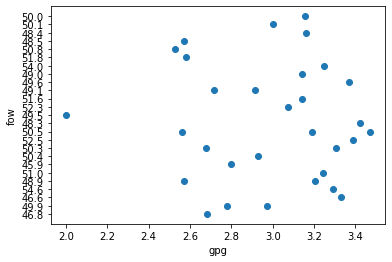

In [17]:
x_values = df["goals per game"]
y_values = df["faceoffs won"]
plt.scatter(x_values,y_values)
plt.xlabel('gpg')
plt.ylabel('fow')
plt.show()

In [18]:
teams = response["teams"]
goalspergame  =[]
shotsPerGame = []
name = []

for x in teams:
    output1 = x["teamStats"]
    output2 = output1[0]["splits"]
    output3 = output2[0]["stat"]
    goalspergame.append(output3["goalsPerGame"])
    shotsPerGame.append(output3["shotsPerGame"])
    name.append(x["name"])
print(goalspergame, shotsPerGame, name)

[2.681, 2.779, 3.329, 3.29, 3.203, 3.243, 2.797, 2.93, 2.676, 3.386, 3.191, 3.304, 3.471, 3.42, 2.971, 2.0, 3.072, 3.141, 2.914, 3.371, 3.141, 3.246, 2.563, 2.58, 2.529, 2.571, 2.571, 3.159, 3.0, 2.714, 3.155] [30.6812, 29.6471, 31.0714, 31.3913, 31.942, 32.1, 29.2899, 34.1127, 30.6197, 32.8857, 33.25, 32.6522, 31.0857, 31.971, 31.8143, 27.0986, 33.1449, 30.6901, 31.6, 32.2429, 29.5775, 31.2029, 29.662, 30.6232, 33.2143, 30.0143, 32.4571, 30.1014, 31.2958, 31.7143, 34.507] ['New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Boston Bruins', 'Buffalo Sabres', 'Montréal Canadiens', 'Ottawa Senators', 'Toronto Maple Leafs', 'Carolina Hurricanes', 'Florida Panthers', 'Tampa Bay Lightning', 'Washington Capitals', 'Chicago Blackhawks', 'Detroit Red Wings', 'Nashville Predators', 'St. Louis Blues', 'Calgary Flames', 'Colorado Avalanche', 'Edmonton Oilers', 'Vancouver Canucks', 'Anaheim Ducks', 'Dallas Stars', 'Los Angeles Kings', 'San 

In [19]:
df = pd.DataFrame({ "name": name, "goals per game": goalspergame, "shots per game": shotsPerGame})
df

,name,goals per game,shots per game
0,New Jersey Devils,2.681,30.6812
1,New York Islanders,2.779,29.6471
2,New York Rangers,3.329,31.0714
3,Philadelphia Flyers,3.290,31.3913
4,Pittsburgh Penguins,3.203,31.9420
5,Boston Bruins,3.243,32.1000
6,Buffalo Sabres,2.797,29.2899
7,Montréal Canadiens,2.930,34.1127
8,Ottawa Senators,2.676,30.6197
9,Toronto Maple Leafs,3.386,32.8857


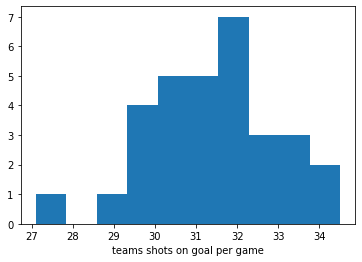

NormaltestResult(statistic=2.054267751319833, pvalue=0.3580316546572873)


In [20]:
plt.hist(shotsPerGame)
plt.xlabel('teams shots on goal per game')
plt.ylabel('')
plt.show()
print(sts.normaltest(shotsPerGame))

In [21]:
mean_numpy = np.mean(goalspergame)
median_numpy = np.median(goalspergame)
print(f"The Mean Goals Per Game Is {mean_numpy}")
print(f"The Median Goals Per Game Is {median_numpy}")
mean_numpy = np.mean(shotsPerGame)
median_numpy = np.median(shotsPerGame)
print(f"The Mean Shots Per Game Is {mean_numpy}")
print(f"The Median Shots Per Game Is {median_numpy}")

The Mean Goals Per Game Is 2.9805806451612904
The Median Goals Per Game Is 3.072
The Mean Shots Per Game Is 31.408403225806445
The Median Shots Per Game Is 31.3913


In [22]:
var_numpy = np.var(goalspergame, ddof = 1)
print(f"The variance for goals per game is {var_numpy}")
sd_numpy = np.std(goalspergame, ddof = 1)
print(f"The standard deviation for goals per game is {sd_numpy}")
var_numpy = np.var(shotsPerGame, ddof = 1)
print(f"The variance for shots per game is {var_numpy}")
sd_numpy = np.std(shotsPerGame, ddof = 1)
print(f"The standard deviation for shots per game is {sd_numpy}")

The variance for goals per game is 0.11994878494623654
The standard deviation for goals per game is 0.3463362310620079
The variance for shots per game is 2.408590230989246
The standard deviation for shots per game is 1.551963347179709


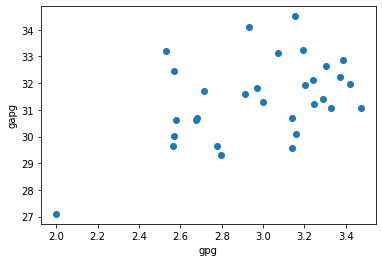

In [23]:
x_values = df["goals per game"]
y_values = df["shots per game"]
plt.scatter(x_values,y_values)
plt.xlabel('gpg')
plt.ylabel('gapg')
plt.show()

The r-squared is: 0.2188893290981638


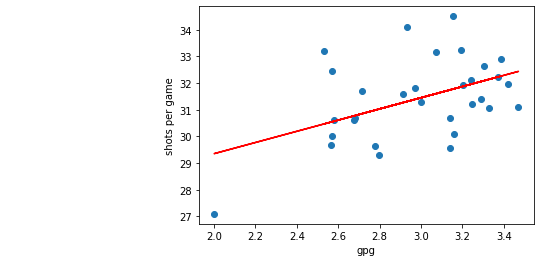

In [24]:
x_values = df["goals per game"]
y_values = df["shots per game"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,25),fontsize=15,color="red")
plt.xlabel('gpg')
plt.ylabel('shots per game')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [25]:
teams = response["teams"]
goalspergame  =[]
wins = []
name = []

for x in teams:
    output1 = x["teamStats"]
    output2 = output1[0]["splits"]
    output3 = output2[0]["stat"]
    goalspergame.append(output3["goalsPerGame"])
    wins.append(output3["wins"])
    name.append(x["name"])
print(goalspergame, wins, name)

[2.681, 2.779, 3.329, 3.29, 3.203, 3.243, 2.797, 2.93, 2.676, 3.386, 3.191, 3.304, 3.471, 3.42, 2.971, 2.0, 3.072, 3.141, 2.914, 3.371, 3.141, 3.246, 2.563, 2.58, 2.529, 2.571, 2.571, 3.159, 3.0, 2.714, 3.155] [28, 35, 37, 41, 40, 44, 30, 31, 25, 36, 38, 35, 43, 41, 32, 17, 35, 42, 36, 42, 37, 36, 29, 37, 29, 29, 33, 35, 37, 33, 39] ['New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Boston Bruins', 'Buffalo Sabres', 'Montréal Canadiens', 'Ottawa Senators', 'Toronto Maple Leafs', 'Carolina Hurricanes', 'Florida Panthers', 'Tampa Bay Lightning', 'Washington Capitals', 'Chicago Blackhawks', 'Detroit Red Wings', 'Nashville Predators', 'St. Louis Blues', 'Calgary Flames', 'Colorado Avalanche', 'Edmonton Oilers', 'Vancouver Canucks', 'Anaheim Ducks', 'Dallas Stars', 'Los Angeles Kings', 'San Jose Sharks', 'Columbus Blue Jackets', 'Minnesota Wild', 'Winnipeg Jets', 'Arizona Coyotes', 'Vegas Golden Knights']


In [66]:
df = pd.DataFrame({ "name": name, "goals per game": goalspergame, "wins": wins})
df

,name,goals per game,wins
0,New Jersey Devils,2.681,28
1,New York Islanders,2.779,35
2,New York Rangers,3.329,37
3,Philadelphia Flyers,3.290,41
4,Pittsburgh Penguins,3.203,40
5,Boston Bruins,3.243,44
6,Buffalo Sabres,2.797,30
7,Montréal Canadiens,2.930,31
8,Ottawa Senators,2.676,25
9,Toronto Maple Leafs,3.386,36


In [67]:
mean_numpy = np.mean(goalspergame)
median_numpy = np.median(goalspergame)
print(f"The Mean Goals Per Game Is {mean_numpy}")
print(f"The Median Goals Per Game Is {median_numpy}")
mean_numpy = np.mean(wins)
median_numpy = np.median(wins)
print(f"The Mean Wins Per Team Is {mean_numpy}")
print(f"The Median Wins Per Team Is {median_numpy}")

The Mean Goals Per Game Is 2.9805806451612904
The Median Goals Per Game Is 3.072
The Mean Wins Per Team Is 34.903225806451616
The Median Wins Per Team Is 36.0


In [68]:
var_numpy = np.var(goalspergame, ddof = 1)
print(f"The variance for goals per game is {var_numpy}")
sd_numpy = np.std(goalspergame, ddof = 1)
print(f"The standard deviation for goals per game is {sd_numpy}")
var_numpy = np.var(wins, ddof = 1)
print(f"The variance for wins per team is {var_numpy}")
sd_numpy = np.std(wins, ddof = 1)
print(f"The standard deviation for wins per team is {sd_numpy}")

The variance for goals per game is 0.11994878494623654
The standard deviation for goals per game is 0.3463362310620079
The variance for wins per team is 34.09032258064517
The standard deviation for wins per team is 5.838691855257063


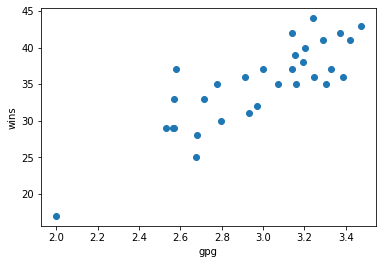

In [69]:
x_values = df["goals per game"]
y_values = df["wins"]
plt.scatter(x_values,y_values)
plt.xlabel('gpg')
plt.ylabel('wins')
plt.show()

The r-squared is: 0.704037539362996


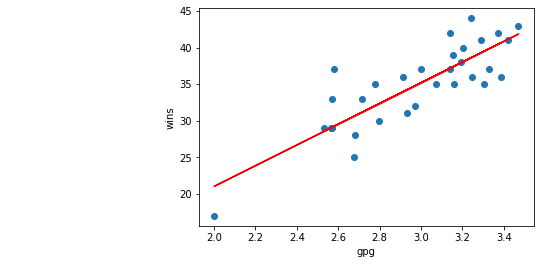

In [70]:
x_values = df["goals per game"]
y_values = df["wins"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,25),fontsize=15,color="red")
plt.xlabel('gpg')
plt.ylabel('wins')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [58]:
teams = response["teams"]
savePctg  =[]
wins = []
name = []

for x in teams:
    output1 = x["teamStats"]
    output2 = output1[0]["splits"]
    output3 = output2[0]["stat"]
    savePctg.append(output3["savePctg"])
    wins.append(output3["wins"])
    name.append(x["name"])
print(savePctg, wins, name)

[0.901, 0.911, 0.908, 0.903, 0.904, 0.921, 0.9, 0.9, 0.9, 0.901, 0.903, 0.899, 0.91, 0.898, 0.913, 0.886, 0.901, 0.91, 0.906, 0.913, 0.905, 0.907, 0.901, 0.92, 0.899, 0.895, 0.913, 0.897, 0.913, 0.919, 0.9] [28, 35, 37, 41, 40, 44, 30, 31, 25, 36, 38, 35, 43, 41, 32, 17, 35, 42, 36, 42, 37, 36, 29, 37, 29, 29, 33, 35, 37, 33, 39] ['New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Boston Bruins', 'Buffalo Sabres', 'Montréal Canadiens', 'Ottawa Senators', 'Toronto Maple Leafs', 'Carolina Hurricanes', 'Florida Panthers', 'Tampa Bay Lightning', 'Washington Capitals', 'Chicago Blackhawks', 'Detroit Red Wings', 'Nashville Predators', 'St. Louis Blues', 'Calgary Flames', 'Colorado Avalanche', 'Edmonton Oilers', 'Vancouver Canucks', 'Anaheim Ducks', 'Dallas Stars', 'Los Angeles Kings', 'San Jose Sharks', 'Columbus Blue Jackets', 'Minnesota Wild', 'Winnipeg Jets', 'Arizona Coyotes', 'Vegas Golden Knights']


In [59]:
df = pd.DataFrame({ "name": name, "save %": savePctg, "wins": wins})
df

,name,save %,wins
0,New Jersey Devils,0.901,28
1,New York Islanders,0.911,35
2,New York Rangers,0.908,37
3,Philadelphia Flyers,0.903,41
4,Pittsburgh Penguins,0.904,40
5,Boston Bruins,0.921,44
6,Buffalo Sabres,0.900,30
7,Montréal Canadiens,0.900,31
8,Ottawa Senators,0.900,25
9,Toronto Maple Leafs,0.901,36


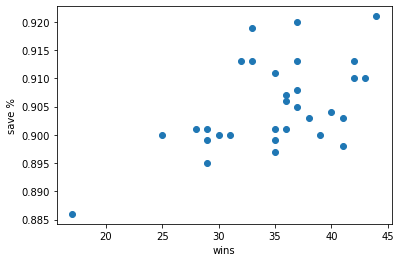

In [62]:
x_values = df["wins"]
y_values = df["save %"]
plt.scatter(x_values,y_values)
plt.xlabel('wins')
plt.ylabel('save %')
plt.show()

In [64]:
x_values = df["wins"]
y_values = df["save %"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(1,25),fontsize=15,color="red")
# plt.xlabel('gpg')
# plt.ylabel('gapg')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.704037539362996


In [35]:
teams = response["teams"]
powerPlayOpportunities  =[]
powerPlayGoals = []
name = []

for x in teams:
    output1 = x["teamStats"]
    output2 = output1[0]["splits"]
    output3 = output2[0]["stat"]
    powerPlayOpportunities.append(output3["powerPlayOpportunities"])
    powerPlayGoals.append(output3["powerPlayGoals"])
    name.append(x["name"])
print(powerPlayOpportunities, powerPlayGoals, name)

[234.0, 168.0, 227.0, 226.0, 211.0, 226.0, 196.0, 186.0, 211.0, 195.0, 206.0, 211.0, 212.0, 216.0, 217.0, 215.0, 226.0, 202.0, 193.0, 241.0, 200.0, 236.0, 184.0, 199.0, 193.0, 189.0, 189.0, 216.0, 205.0, 214.0, 191.0] [42.0, 29.0, 52.0, 47.0, 42.0, 57.0, 37.0, 33.0, 30.0, 45.0, 46.0, 45.0, 49.0, 42.0, 33.0, 32.0, 39.0, 49.0, 41.0, 46.0, 59.0, 57.0, 27.0, 42.0, 33.0, 33.0, 31.0, 46.0, 42.0, 41.0, 42.0] ['New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Boston Bruins', 'Buffalo Sabres', 'Montréal Canadiens', 'Ottawa Senators', 'Toronto Maple Leafs', 'Carolina Hurricanes', 'Florida Panthers', 'Tampa Bay Lightning', 'Washington Capitals', 'Chicago Blackhawks', 'Detroit Red Wings', 'Nashville Predators', 'St. Louis Blues', 'Calgary Flames', 'Colorado Avalanche', 'Edmonton Oilers', 'Vancouver Canucks', 'Anaheim Ducks', 'Dallas Stars', 'Los Angeles Kings', 'San Jose Sharks', 'Columbus Blue Jackets', 'Minnesota Wild', 'Winnipeg Jets',

In [36]:
df = pd.DataFrame({ "name": name, "power plays": powerPlayOpportunities, "pp goals": powerPlayGoals})
df

,name,power plays,pp goals
0,New Jersey Devils,234.0,42.0
1,New York Islanders,168.0,29.0
2,New York Rangers,227.0,52.0
3,Philadelphia Flyers,226.0,47.0
4,Pittsburgh Penguins,211.0,42.0
5,Boston Bruins,226.0,57.0
6,Buffalo Sabres,196.0,37.0
7,Montréal Canadiens,186.0,33.0
8,Ottawa Senators,211.0,30.0
9,Toronto Maple Leafs,195.0,45.0


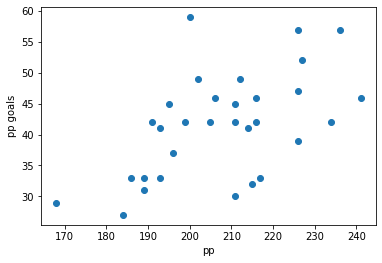

In [37]:
x_values = df["power plays"]
y_values = df["pp goals"]
plt.scatter(x_values,y_values)
plt.xlabel('pp')
plt.ylabel('pp goals')
plt.show()

The r-squared is: 0.29453538487236924


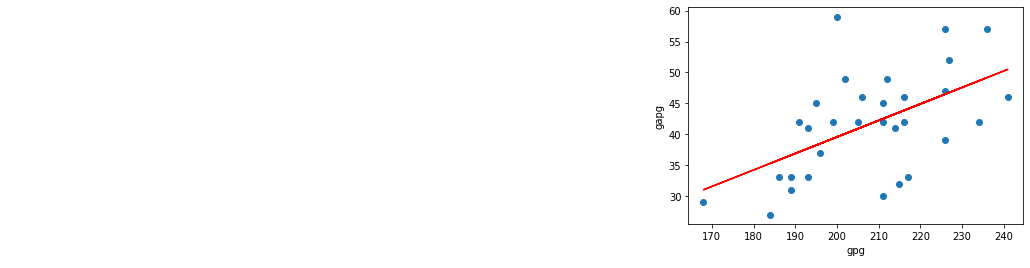

In [38]:
x_values = df["power plays"]
y_values = df["pp goals"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,20),fontsize=15,color="red")
plt.xlabel('gpg')
plt.ylabel('gapg')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [39]:
teams = response["teams"]
powerPlayOpportunities  =[]
name = []

for x in teams:
    output1 = x["teamStats"]
    output2 = output1[0]["splits"]
    output3 = output2[0]["stat"]
    powerPlayOpportunities.append(output3["powerPlayOpportunities"])
    name.append(x["name"])
print(powerPlayOpportunities, name)

[234.0, 168.0, 227.0, 226.0, 211.0, 226.0, 196.0, 186.0, 211.0, 195.0, 206.0, 211.0, 212.0, 216.0, 217.0, 215.0, 226.0, 202.0, 193.0, 241.0, 200.0, 236.0, 184.0, 199.0, 193.0, 189.0, 189.0, 216.0, 205.0, 214.0, 191.0] ['New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Boston Bruins', 'Buffalo Sabres', 'Montréal Canadiens', 'Ottawa Senators', 'Toronto Maple Leafs', 'Carolina Hurricanes', 'Florida Panthers', 'Tampa Bay Lightning', 'Washington Capitals', 'Chicago Blackhawks', 'Detroit Red Wings', 'Nashville Predators', 'St. Louis Blues', 'Calgary Flames', 'Colorado Avalanche', 'Edmonton Oilers', 'Vancouver Canucks', 'Anaheim Ducks', 'Dallas Stars', 'Los Angeles Kings', 'San Jose Sharks', 'Columbus Blue Jackets', 'Minnesota Wild', 'Winnipeg Jets', 'Arizona Coyotes', 'Vegas Golden Knights']


In [40]:
df = pd.DataFrame({ "name": name, "power plays": powerPlayOpportunities})
df

,name,power plays
0,New Jersey Devils,234.0
1,New York Islanders,168.0
2,New York Rangers,227.0
3,Philadelphia Flyers,226.0
4,Pittsburgh Penguins,211.0
5,Boston Bruins,226.0
6,Buffalo Sabres,196.0
7,Montréal Canadiens,186.0
8,Ottawa Senators,211.0
9,Toronto Maple Leafs,195.0


In [41]:
teams_and_powerplays = df[["name", "power plays"]]
teams_and_powerplays = teams_and_powerplays.set_index("name")
teams_and_powerplays.head()

,power plays
name,
New Jersey Devils,234.0
New York Islanders,168.0
New York Rangers,227.0
Philadelphia Flyers,226.0
Pittsburgh Penguins,211.0


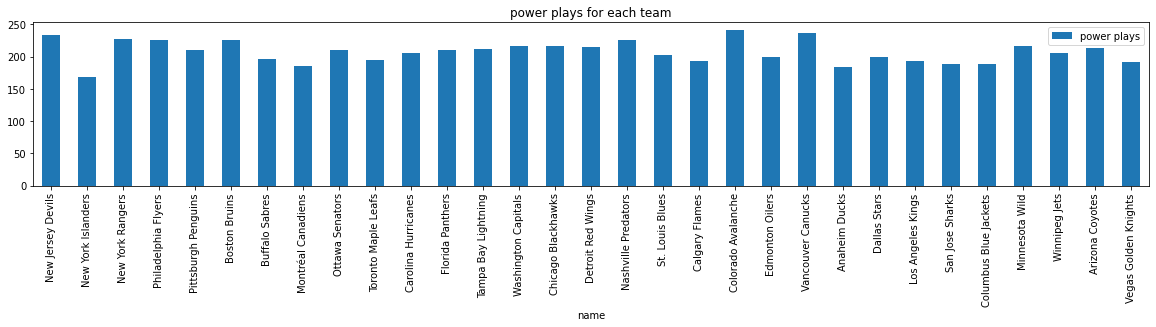

<Figure size 432x288 with 0 Axes>

In [42]:
teams_and_powerplays.plot(kind="bar", figsize=(20,3))
plt.title("power plays for each team")
plt.show()
plt.tight_layout()

In [43]:
mean_numpy = np.mean(powerPlayOpportunities)
median_numpy = np.median(powerPlayOpportunities)
print(f"The Mean Power Plays Is {mean_numpy}")
print(f"The Median Power Plays Is {median_numpy}")

The Mean Power Plays Is 207.58064516129033
The Median Power Plays Is 211.0


In [44]:
z_scipy = sts.zscore(powerPlayOpportunities)
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are [ 1.56436788 -2.34368668  1.14987725  1.0906643   0.20247008  1.0906643
 -0.68572414 -1.27785362  0.20247008 -0.74493709 -0.09359466  0.20247008
  0.26168303  0.49853482  0.55774777  0.43932187  1.0906643  -0.33044645
 -0.86336298  1.97885852 -0.44887235  1.68279378 -1.39627951 -0.50808529
 -0.86336298 -1.10021477 -1.10021477  0.49853482 -0.15280761  0.38010892
 -0.98178888]


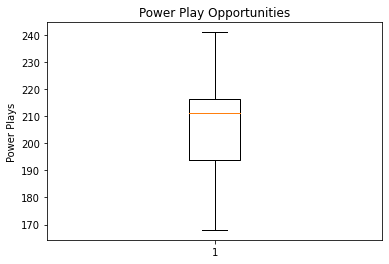

In [45]:
fig1, ax1 = plt.subplots()
ax1.set_title('Power Play Opportunities')
ax1.set_ylabel('Power Plays')
ax1.boxplot(powerPlayOpportunities)
plt.show()

In [46]:
teams = response["teams"]
goalsPerGame  =[]
name = []

for x in teams:
    output1 = x["teamStats"]
    output2 = output1[0]["splits"]
    output3 = output2[0]["stat"]
    goalsPerGame.append(output3["goalsPerGame"])
    name.append(x["name"])
print(goalsPerGame, name)

[2.681, 2.779, 3.329, 3.29, 3.203, 3.243, 2.797, 2.93, 2.676, 3.386, 3.191, 3.304, 3.471, 3.42, 2.971, 2.0, 3.072, 3.141, 2.914, 3.371, 3.141, 3.246, 2.563, 2.58, 2.529, 2.571, 2.571, 3.159, 3.0, 2.714, 3.155] ['New Jersey Devils', 'New York Islanders', 'New York Rangers', 'Philadelphia Flyers', 'Pittsburgh Penguins', 'Boston Bruins', 'Buffalo Sabres', 'Montréal Canadiens', 'Ottawa Senators', 'Toronto Maple Leafs', 'Carolina Hurricanes', 'Florida Panthers', 'Tampa Bay Lightning', 'Washington Capitals', 'Chicago Blackhawks', 'Detroit Red Wings', 'Nashville Predators', 'St. Louis Blues', 'Calgary Flames', 'Colorado Avalanche', 'Edmonton Oilers', 'Vancouver Canucks', 'Anaheim Ducks', 'Dallas Stars', 'Los Angeles Kings', 'San Jose Sharks', 'Columbus Blue Jackets', 'Minnesota Wild', 'Winnipeg Jets', 'Arizona Coyotes', 'Vegas Golden Knights']


In [47]:
df = pd.DataFrame({ "name": name, "goals per game": goalsPerGame})
df

,name,goals per game
0,New Jersey Devils,2.681
1,New York Islanders,2.779
2,New York Rangers,3.329
3,Philadelphia Flyers,3.290
4,Pittsburgh Penguins,3.203
5,Boston Bruins,3.243
6,Buffalo Sabres,2.797
7,Montréal Canadiens,2.930
8,Ottawa Senators,2.676
9,Toronto Maple Leafs,3.386


In [48]:
goalspg = df[["name", "goals per game"]]
goalspg = goalspg.set_index("name")
goalspg.head()

,goals per game
name,
New Jersey Devils,2.681
New York Islanders,2.779
New York Rangers,3.329
Philadelphia Flyers,3.290
Pittsburgh Penguins,3.203


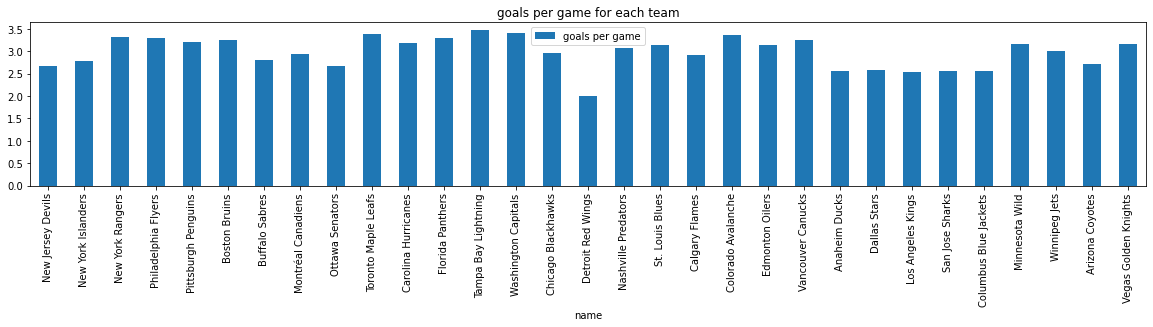

<Figure size 432x288 with 0 Axes>

In [49]:
goalspg.plot(kind="bar", figsize=(20,3))
plt.title("goals per game for each team")
plt.show()
plt.tight_layout()

In [50]:
z_scipy = sts.zscore(goalsPerGame)
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are [-0.87929792 -0.59165852  1.02264421  0.90817547  0.65282213  0.77022597
 -0.5388268  -0.14845904 -0.8939734   1.18994468  0.61760098  0.94926682
  1.43942783  1.28973794 -0.02812011 -2.87809821  0.26832457  0.47084619
 -0.19542058  1.14591824  0.47084619  0.77903126 -1.22563923 -1.1757426
 -1.32543249 -1.20215846 -1.20215846  0.52367791  0.05699767 -0.78243975
  0.51193753]


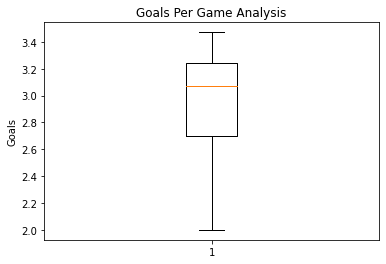

In [51]:
fig1, ax1 = plt.subplots()
ax1.set_title('Goals Per Game Analysis')
ax1.set_ylabel('Goals')
ax1.boxplot(goalsPerGame)
plt.show()